# Examples

Here are some examples to get you familiar with the mocking objects. For more details, please read the documentation in the "mocks" module.

In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from mocks import MockConv, MockPool, MockModel

In [2]:
def draw_receptive_fields(axis, receptive_fields, layer_names=None):
    n_layers = len(all_receptive_fields)
    layer_nums = list(range(1, n_layers + 1))
    axis.plot(layer_nums, receptive_fields, linewidth=1.1, marker="o", markersize=4)
    if layer_names is not None:
        axis.set_xticks(layer_nums)
        axis.set_xticklabels(layer_names, rotation=90)
    else:
        axis.xaxis.set_major_locator(MaxNLocator(integer=True))
    axis.yaxis.set_major_locator(MaxNLocator(integer=True))
    axis.set_ylabel("Receptive field", fontsize=9)
    axis.set_xlabel("Layer", fontsize=9)
    axis.tick_params(labelsize=7)
    axis.grid()
    return axis

## Simple convolutional network

Layer idx <name> (kernel size, stride, dilation rate)
-----------------------------------------------------
Layer 1 conv1                (k3, s1, d1) 
Layer 2 pool1                (k2, s2, d1) 
Layer 3 conv2                (k3, s1, d1) 
Layer 4 pool2                (k2, s2, d1) 

The receptive field of the model is 10.


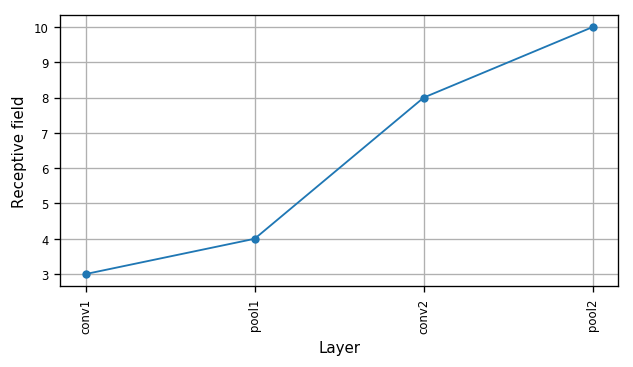

In [3]:
# Build the mocking model

model = MockModel()
# Because it is so simple, we can add the layers one by one instead of using blocks and loops.
model.add(MockConv(3, name="conv1"))
model.add(MockPool(2, name="pool1"))
model.add(MockConv(3, name="conv2"))
model.add(MockPool(2, name="pool2"))

model.summary()

# Let's see the receptive field
output_receptive_field, all_receptive_fields = model.get_receptive_field()
print("The receptive field of the model is {}.".format(output_receptive_field))

# Plot the dynamics of the receptive field across the model's layers.
WANT_NAMES = True

layer_names = model.get_layer_names() if WANT_NAMES else None
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)
ax = draw_receptive_fields(ax, all_receptive_fields, layer_names=layer_names)
plt.show()

## Large convolutional network

A convolutional network composed of several blocks of conv-conv-pool where every convolution has the same kernel size and every pooling layer halves the dimensionality with a pool size 2. This scheme, or variations of it, is widely used thanks to the VGG nets. For receptive field purposes, this scheme (or the one in the next example) is also valid for ResNets, because skip connections do not change the receptive field size.

Layer idx <name> (kernel size, stride, dilation rate)
-----------------------------------------------------
Layer 1 conv-1a              (k3, s1, d1) 
Layer 2 conv-1b              (k3, s1, d1) 
Layer 3 pool-1               (k2, s2, d1) 
Layer 4 conv-2a              (k3, s1, d1) 
Layer 5 conv-2b              (k3, s1, d1) 
Layer 6 pool-2               (k2, s2, d1) 
Layer 7 conv-3a              (k3, s1, d1) 
Layer 8 conv-3b              (k3, s1, d1) 
Layer 9 pool-3               (k2, s2, d1) 
Layer 10 conv-4a              (k3, s1, d1) 
Layer 11 conv-4b              (k3, s1, d1) 
Layer 12 pool-4               (k2, s2, d1) 
Layer 13 conv-5a              (k3, s1, d1) 
Layer 14 conv-5b              (k3, s1, d1) 
Layer 15 pool-5               (k2, s2, d1) 

The receptive field of the model is 156.


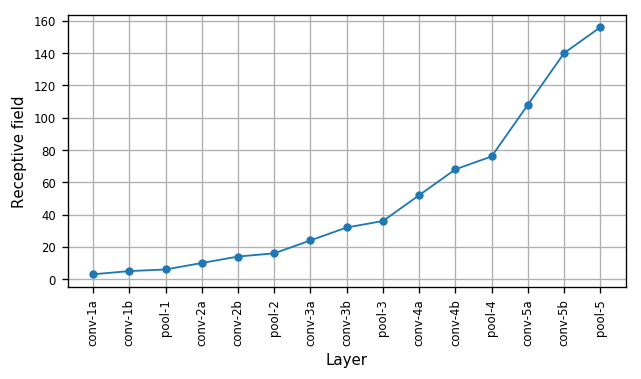

In [4]:
# Build the mocking model
N_CONV_BLOCKS = 5
KERNEL_SIZE = 3

model = MockModel()
for i in range(N_CONV_BLOCKS):
    block_num = i + 1
    block = MockModel([
        MockConv(KERNEL_SIZE, name="conv-{}a".format(block_num)),
        MockConv(KERNEL_SIZE, name="conv-{}b".format(block_num)),
        MockPool(2, name="pool-{}".format(block_num))
    ])
    model.add(block)

model.summary()

# Let's see the receptive field
output_receptive_field, all_receptive_fields = model.get_receptive_field()
print("The receptive field of the model is {}.".format(output_receptive_field))

# Plot the dynamics of the receptive field across the model's layers.
WANT_NAMES = True

layer_names = model.get_layer_names() if WANT_NAMES else None
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)
ax = draw_receptive_fields(ax, all_receptive_fields, layer_names=layer_names)
plt.show()

## Strided convolutional network

Layer idx <name> (kernel size, stride, dilation rate)
-----------------------------------------------------
Layer 1 conv-1a              (k3, s2, d1) 
Layer 2 conv-1b              (k3, s1, d1) 
Layer 3 conv-2a              (k3, s2, d1) 
Layer 4 conv-2b              (k3, s1, d1) 
Layer 5 conv-3a              (k3, s2, d1) 
Layer 6 conv-3b              (k3, s1, d1) 
Layer 7 conv-4a              (k3, s2, d1) 
Layer 8 conv-4b              (k3, s1, d1) 
Layer 9 conv-5a              (k3, s2, d1) 
Layer 10 conv-5b              (k3, s1, d1) 

The receptive field of the model is 187.


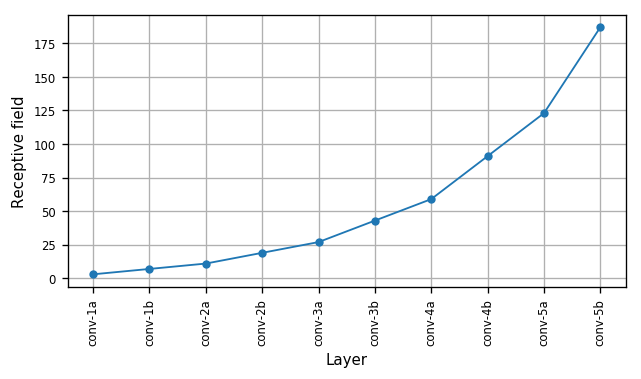

In [5]:
# Build the mocking model
N_CONV_BLOCKS = 5
KERNEL_SIZE = 3

model = MockModel()
for i in range(N_CONV_BLOCKS):
    block_num = i + 1
    block = MockModel([
        MockConv(KERNEL_SIZE, stride=2, name="conv-{}a".format(block_num)),
        MockConv(KERNEL_SIZE, name="conv-{}b".format(block_num)),
    ])
    model.add(block)

model.summary()

# Let's see the receptive field
output_receptive_field, all_receptive_fields = model.get_receptive_field()
print("The receptive field of the model is {}.".format(output_receptive_field))

# Plot the dynamics of the receptive field across the model's layers.
WANT_NAMES = True

layer_names = model.get_layer_names() if WANT_NAMES else None
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)
ax = draw_receptive_fields(ax, all_receptive_fields, layer_names=layer_names)
plt.show()

## Dilated convolutional network - First variant

Dilation allows the receptive field to be increased by coarsening the resolution of the convolutional operation without using downsampling (i.e., the feature map size can be preserved if desired). Let's consider a model where the dilation rate is exponentially increased after each block.

Layer idx <name> (kernel size, stride, dilation rate)
-----------------------------------------------------
Layer 1 conv-1a              (k3, s1, d1) 
Layer 2 conv-1b              (k3, s1, d1) 
Layer 3 conv-2a              (k3, s1, d2) 
Layer 4 conv-2b              (k3, s1, d2) 
Layer 5 conv-3a              (k3, s1, d4) 
Layer 6 conv-3b              (k3, s1, d4) 
Layer 7 conv-4a              (k3, s1, d8) 
Layer 8 conv-4b              (k3, s1, d8) 
Layer 9 conv-5a              (k3, s1, d16) 
Layer 10 conv-5b              (k3, s1, d16) 

The receptive field of the model is 125.


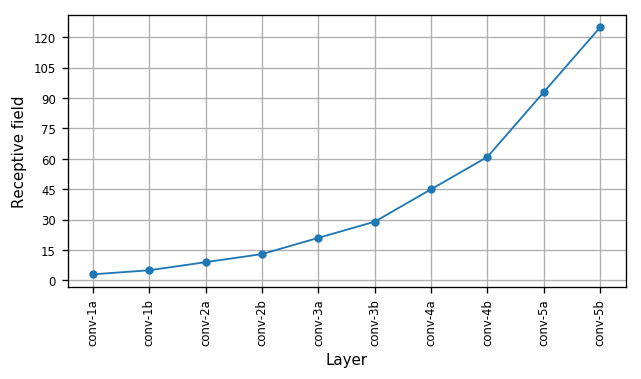

In [6]:
# Build the mocking model
N_CONV_BLOCKS = 5
KERNEL_SIZE = 3

model = MockModel()
for i in range(N_CONV_BLOCKS):
    block_num = i + 1
    dilation_rate = 2 ** i
    block = MockModel([
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-{}a".format(block_num)),
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-{}b".format(block_num)),
    ])
    model.add(block)

model.summary()

# Let's see the receptive field
output_receptive_field, all_receptive_fields = model.get_receptive_field()
print("The receptive field of the model is {}.".format(output_receptive_field))

# Plot the dynamics of the receptive field across the model's layers.
WANT_NAMES = True

layer_names = model.get_layer_names() if WANT_NAMES else None
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)
ax = draw_receptive_fields(ax, all_receptive_fields, layer_names=layer_names)
plt.show()

## Dilated convolutional network - Second variant

Now, let's consider a model that starts with an exponentially increasing dilation rate, but then it exponentially decreases the dilation rate until it is 1 again.

Layer idx <name> (kernel size, stride, dilation rate)
-----------------------------------------------------
Layer 1 conv-up1a            (k3, s1, d1) 
Layer 2 conv-up1b            (k3, s1, d1) 
Layer 3 conv-up2a            (k3, s1, d2) 
Layer 4 conv-up2b            (k3, s1, d2) 
Layer 5 conv-up3a            (k3, s1, d4) 
Layer 6 conv-up3b            (k3, s1, d4) 
Layer 7 conv-up4a            (k3, s1, d8) 
Layer 8 conv-up4b            (k3, s1, d8) 
Layer 9 conv-up5a            (k3, s1, d16) 
Layer 10 conv-up5b            (k3, s1, d16) 
Layer 11 conv-down1a          (k3, s1, d8) 
Layer 12 conv-down1b          (k3, s1, d8) 
Layer 13 conv-down2a          (k3, s1, d4) 
Layer 14 conv-down2b          (k3, s1, d4) 
Layer 15 conv-down3a          (k3, s1, d2) 
Layer 16 conv-down3b          (k3, s1, d2) 
Layer 17 conv-down4a          (k3, s1, d1) 
Layer 18 conv-down4b          (k3, s1, d1) 

The receptive field of the model is 185.


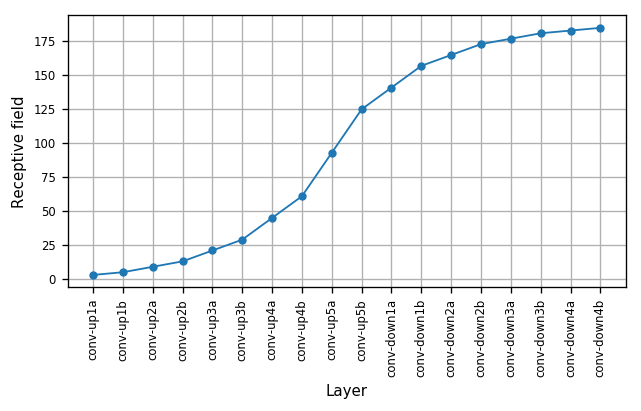

In [7]:
# Build the mocking model
N_CONV_BLOCKS_UP = 5
KERNEL_SIZE = 3

model = MockModel()
for i in range(N_CONV_BLOCKS_UP):
    block_num = i + 1
    dilation_rate = 2 ** i
    block = MockModel([
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-up{}a".format(block_num)),
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-up{}b".format(block_num)),
    ])
    model.add(block)
for i in range(N_CONV_BLOCKS_UP - 1):
    block_num = i + 1
    dilation_rate = 2 ** (N_CONV_BLOCKS_UP - 2 - i)
    block = MockModel([
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-down{}a".format(block_num)),
        MockConv(KERNEL_SIZE, dilation_rate=dilation_rate, name="conv-down{}b".format(block_num))
    ])
    model.add(block)

model.summary()

# Let's see the receptive field
output_receptive_field, all_receptive_fields = model.get_receptive_field()
print("The receptive field of the model is {}.".format(output_receptive_field))

# Plot the dynamics of the receptive field across the model's layers.
WANT_NAMES = True

layer_names = model.get_layer_names() if WANT_NAMES else None
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi=120)
ax = draw_receptive_fields(ax, all_receptive_fields, layer_names=layer_names)
plt.show()